## Introdução

A Detecção de Objetos é uma problemática comum do aprendizado profundo, cujo objetivo é responder a duas perguntas essenciais sobre uma imagem ou vídeo: "o que" são os objetos presentes e "onde" eles estão localizados.

O principal desafio da detecção de objetos é a sua complexidade. Um modelo precisa ser capaz de encontrar múltiplos objetos de diferentes classes, tamanhos e orientações, muitas vezes sobrepostos (oclusão) ou sob condições variadas de iluminação e perspectiva.

## Tarefa: Detecção de objetos

A **detecção de objetos** é uma tarefa central da Visão Computacional que envolve **identificar o que há em uma imagem** e **localizar onde esses objetos estão**.

---

### Objetivos da Detecção de Objetos

1. **Localizar**: desenhar uma *bounding box* em torno do objeto.
2. **Classificar**: dizer qual é o objeto dentro da caixa.
3. **(Opcional)**: contar quantos objetos de cada tipo existem.

---

### Diferença entre Tarefas Relacionadas

| Tarefa                 | Objetivo                                     | Exemplo                                       |
|------------------------|----------------------------------------------|-----------------------------------------------|
| Classificação          | O que há na imagem                           | “Tem um cachorro na imagem.”                  |
| Localização            | Onde está o objeto principal                 | “O cachorro está nessa posição.”              |
| **Detecção de Objetos**| O que há e onde está cada item               | “Dois cachorros e uma bola, nessas posições.” |
| Segmentação (avançado) | Forma exata do objeto, por pixel             | “Recorte preciso da forma do cachorro.”       |

---
## No Nosso Projeto

- Usamos a detecção de objetos para **encontrar o personagem Wally** em imagens lotadas de elementos visuais.
- Treinamos os modelos YOLO em um **dataset customizado**, onde cada imagem tinha a **posição exata do Wally anotada**.
- O objetivo era que o modelo previsse automaticamente **a caixa onde o Wally está**.

---

## Dataset - "Onde está o Waldo?"

Para treinar nosso modelo de detecção de objetos, utilizamos um **dataset customizado** focado na identificação do personagem Wally (ou Waldo) em imagens de alta complexidade visual.

---

### Composição do Dataset

- Selecionamos imagens em **alta resolução** dos livros da série “Where's Waldo?”.
- Realizamos **anotações manuais** com as **bounding boxes**, marcando a posição exata do Wally em cada imagem.
- As anotações seguem o formato exigido pelos modelos YOLO (arquivos `.txt` com classe + coordenadas normalizadas).

---

## Principal Desafio: Relação Sinal-Ruído

> O Wally ocupa uma **área muito pequena** da imagem, e está cercado por uma enorme quantidade de **informação irrelevante**.

- **Sinal**: O objeto de interesse é o Wally, que geralmente ocupa menos de **0,5% da imagem**.
- **Ruído**: As imagens são extremamente densas, com muitos personagens e padrões visuais similares, o que exige que o modelo aprenda a **ser seletivo** e focado.

---
## Características Técnicas do Dataset

- **Falsos positivos intencionais**:
  - Muitas figuras usam roupas com **listras vermelhas e brancas**, semelhantes às do Wally.
  - Isso força o modelo a aprender **padrões visuais mais profundos**, e não apenas cores.

- **Oclusão e Variação**:
  - O Wally aparece frequentemente **parcialmente escondido**, ou em **diferentes escalas e poses**.
  - Isso testa a capacidade do modelo de reconhecer objetos mesmo com **informações parciais**.

- **Diversidade de localização**:
  - Em algumas imagens o Wally está em **posições inesperadas**, como cantos, invertido ou entre objetos confusos.

---
### Fontes dos Dados

- [Kaggle - Where’s Waldo Dataset](https://www.kaggle.com/datasets/residentmario/wheres-waldo)
- [wallpapercave.com](https://wallpapercave.com/wheres-wally-wallpapers)
- [imgur.com - Galeria de imagens Waldo](https://imgur.com/gallery/lets-play-some-wheres-waldo-8exqx)


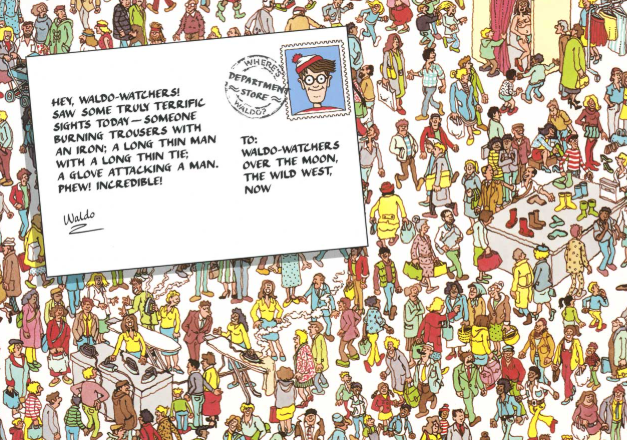

## Aplicações reais

Embora nossa tarefa seja identificar o Wally em imagens ilustradas, ela representa um **cenário análogo a desafios complexos do mundo real** em visão computacional.

---

### 1. Detecção de Pequenas Anomalias em Imagens Médicas

Assim como o Wally, **lesões e tumores** podem aparecer em regiões muito pequenas dentro de exames de imagem, como:

- Ressonâncias magnéticas;
- Tomografias computadorizadas;
- Mamografias, entre outros.

O desafio é o mesmo:
- Um **alvo minúsculo** no meio de uma imagem **visualmente densa**;
- Alta exigência de **precisão e sensibilidade** do modelo.

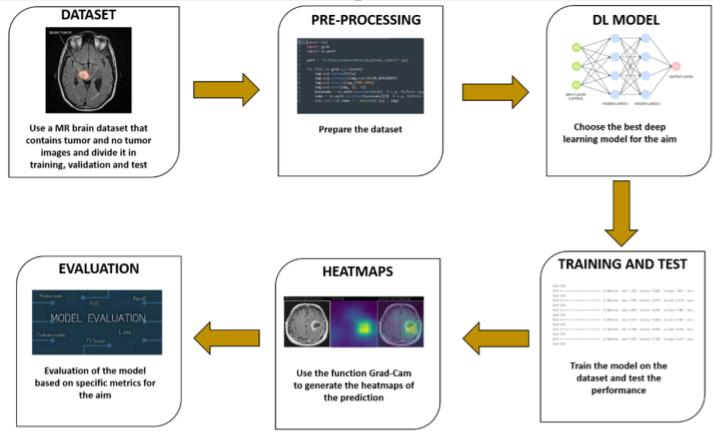

*Exemplo: detecção de tumor cerebral — área pequena em uma imagem médica de alta resolução.*

### 2. Localização de Pessoas em Ambientes Lotados

Outro paralelo direto é a **identificação de uma pessoa específica** em:

- Imagens de multidões;
- Câmeras de segurança;
- Eventos públicos e aeroportos.

Desafios semelhantes:
- Muitas pessoas com **aparência parecida**;
- Oclusões frequentes (parcialmente escondidas);
- Necessidade de **reconhecimento fino de detalhes** como roupas ou objetos pessoais.

---

## YOLO

### O Modelo YOLO: You Only Look Once

YOLO (You Only Look Once) é uma das arquiteturas mais populares para **detecção de objetos em tempo real**. Seu princípio é simples e poderoso: ao invés de analisar partes da imagem separadamente, o YOLO olha para **a imagem inteira de uma vez só** — daí seu nome.

---

### Como o YOLO Funciona?

O YOLO divide a imagem em uma **grade (grid)** e, para cada célula, o modelo prevê:

- A presença (ou não) de um objeto;
- A **classe** do objeto (por exemplo, "Wally");
- As **coordenadas da bounding box** (posição exata).

Esse processamento unificado torna o YOLO extremamente rápido e eficiente.

---

### Por que usar YOLO?

-  **Desempenho em tempo real**: Ideal para aplicações onde velocidade é crucial.
-  **Predições diretas**: Detecção e classificação são feitas em uma única etapa.
-  **Capacidade de generalização**: Funciona bem com dados diversos e cenários complexos.

---

###  Evolução do YOLO até hoje

| Versão | Ano | Destaques |
|--------|-----|-----------|
| YOLOv1–v7 | 2016–2022 | Evolução de precisão e velocidade; primeiros avanços com detecção multiescala. |
| YOLOv8 | 2023 | Reescrito em PyTorch; foco em modularidade, facilidade de uso e tarefas como segmentação. |
| **YOLOv10** | 2024 | Modelo simplificado e mais rápido; camadas redundantes foram eliminadas sem perda de acurácia. |
| **YOLOv11** | 2025 | Introduz novos blocos estruturais e técnicas avançadas de normalização e atenção; melhor desempenho em imagens com objetos pequenos e camuflados. |

---

### Modelos que Utilizamos no Projeto

Durante o projeto, trabalhamos com:

#### YOLOv10

- Enxuto e eficiente.
- Removeu operações desnecessárias (ex: reorg layers e concatenações redundantes).
- Ideal para treinar com menos recursos computacionais.
- Ótimo desempenho em termos de velocidade e estabilidade.

#### YOLOv11

- Modelo mais recente (ainda em rápida evolução).
- Apresenta melhorias no reconhecimento de **pequenos objetos em cenários complexos** — exatamente o nosso caso com o Wally.
- Introduz **camadas otimizadas de atenção**, aprimorando a detecção em imagens densas e com alta oclusão.

---